# [1]. Statistics for Machine Learning

## Gaussian Distribution and Descriptive Stats
Example below generates a sample of 100 random numbers drawn from a Gaussian distribution with a known mean of 50 and a standard deviation of 5 and calculates the summary statistics.

In [1]:
# calculate summary stats
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import var
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate statistics
print('Mean: %.3f' % mean(data))
print('Variance: %.3f' % var(data))
print('Standard Deviation: %.3f' % std(data))

Mean: 50.049
Variance: 24.939
Standard Deviation: 4.994


## Correlation Between Variables
A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease.

- Positive Correlation: Both variables change in the same direction.
- Neutral Correlation: No relationship in the change of the variables.
- Negative Correlation: Variables change in opposite directions.

We can quantify the relationship between samples of two variables using a statistical method called Pearson’s correlation coefficient, named for the developer of the method, Karl Pearson.


In [2]:
# calculate correlation coefficient
from numpy.random import seed
from numpy.random import randn
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, p = pearsonr(data1, data2)
# display the correlation
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


## Statistical Hypothesis Tests
Assume specific structure of the data as outcome and use statistical method to confirm or reject the assumption.

Below is an example of calculating and interpreting the Student’s t-test for two data samples that are known to be different.

In [3]:
# student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.262, p=0.025
Different distributions (reject H0)


## Estimation Statistics
Alternative to Statistical Hypothesis Test

The example below demonstrates this function in a hypothetical case where a model made 88 correct predictions out of a dataset with 100 instances and we are interested in the 95% confidence interval (provided to the function as a significance of 0.05).

In [4]:
# calculate the confidence interval
from statsmodels.stats.proportion import proportion_confint
# calculate the interval
lower, upper = proportion_confint(88, 100, 0.05)
print('lower=%.3f, upper=%.3f' % (lower, upper))

lower=0.816, upper=0.944


## Nonparametric Statistics
Data in which the distribution is unknown or cannot be easily identified is called nonparametric.

A widely used nonparametric statistical hypothesis test for checking for a difference between two independent samples is the Mann-Whitney U test. It is the nonparametric equivalent of the Student’s t-test but does not assume that the data is drawn from a Gaussian distribution.

The Example below demonstrates the test on two data samples drawn from a uniform distribution known to be different.

In [5]:
# example of the mann-whitney u test
from numpy.random import seed
from numpy.random import rand
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 50 + (rand(100) * 10)
data2 = 51 + (rand(100) * 10)
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=4077.000, p=0.012
Different distribution (reject H0)


# [2]. How to Calculate the 5-Number Summary for Your Data in Python
Data summarization techniques provide a way to describe the distribution of data using a few key measurements.

The most common example of data summarization is the calculation of the mean and standard deviation for data that has a Gaussian distribution. With these two parameters alone, you can understand and re-create the distribution of the data. 

The problem is, you cannot easily calculate the mean and standard deviation of data that does not have a Gaussian distribution. Technically, you can calculate these quantities, but they do not summarize the data distribution; in fact, they can be very misleading.

In the case of data that does not have a Gaussian distribution, you can summarize the data sample using the five-number summary.
- Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
- 1st Quartile: The 25th percentile.
- 3rd Quartile: The 75th percentile.
- Minimum: The smallest observation in the sample.
- Maximum: The largest observation in the sample.

In [6]:
# calculate a 5-number summary
from numpy import percentile
from numpy.random import rand
# generate data sample
data = rand(1000)
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.000
Q1: 0.257
Median: 0.509
Q3: 0.754
Max: 0.997


We can see that the spread of observations is close to our expectations showing 0.27 for the 25th percentile 0.53 for the 50th percentile, and 0.76 for the 75th percentile, close to the idealized values of 0.25, 0.50, and 0.75 respectively.

# [3]. Data Visualization Methods in Python

## Line Plot
A line plot is generally used to present observations collected at regular intervals.

The x-axis represents the regular interval, such as time. The y-axis shows the observations, ordered by the x-axis and connected by a line.

The example below creates a sequence of 100 floating point values as the x-axis and a sine wave as a function of the x-axis as the observations on the y-axis. The results are plotted as a line plot.

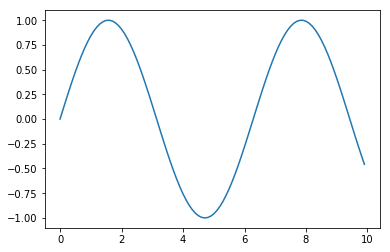

In [8]:
# example of a line plot
from numpy import sin
from matplotlib import pyplot
# consistent interval for x-axis
x = [x*0.1 for x in range(100)]
# function of x for y-axis
y = sin(x)
# create line plot
pyplot.plot(x, y)
# show line plot
pyplot.show()

## Bar Chart
A bar chart is generally used to present relative quantities for multiple categories.

The x-axis represents the categories and are spaced evenly. The y-axis represents the quantity for each category and is drawn as a bar from the baseline to the appropriate level on the y-axis.

The example below creates a dataset with three categories, each defined with a string label. A single random integer value is drawn for the quantity in each category.

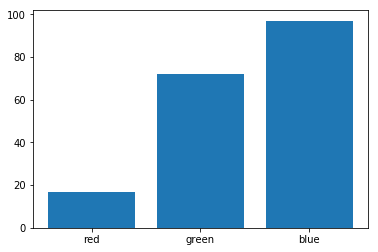

In [9]:
# example of a bar chart
from random import seed
from random import randint
from matplotlib import pyplot
# seed the random number generator
seed(1)
# names for categories
x = ['red', 'green', 'blue']
# quantities for each category
y = [randint(0, 100), randint(0, 100), randint(0, 100)]
# create bar chart
pyplot.bar(x, y)
# show line plot
pyplot.show()

## Histogram Plot
A histogram plot is generally used to summarize the distribution of a data sample.

The x-axis represents discrete bins or intervals for the observations. For example observations with values between 1 and 10 may be split into five bins, the values [1,2] would be allocated to the first bin, [3,4] would be allocated to the second bin, and so on.

The y-axis represents the frequency or count of the number of observations in the dataset that belong to each bin.

The example below creates a dataset of 1,000 random numbers drawn from a standard Gaussian distribution, then plots the dataset as a histogram.

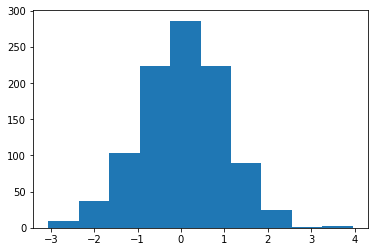

In [10]:
# example of a histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# random numbers drawn from a Gaussian distribution
x = randn(1000)
# create histogram plot
pyplot.hist(x)
# show line plot
pyplot.show()

## Box and Whisker Plot
A box and whisker plot, or boxplot for short, is generally used to summarize the distribution of a data sample.
Boxplots are useful to summarize the distribution of a data sample as an alternative to the histogram. This method is often used when the data has an unknown or unusual distribution, such as non-Gaussian.

The x-axis is used to represent the data sample, where multiple boxplots can be drawn side by side on the x-axis if desired.The y-axis represents the observation values.

The example below creates three boxplots in one chart, each summarizing a data sample drawn from a slightly different Gaussian distribution. Each data sample is created as an array and all three data sample arrays are added to a list that is padded to the plotting function.

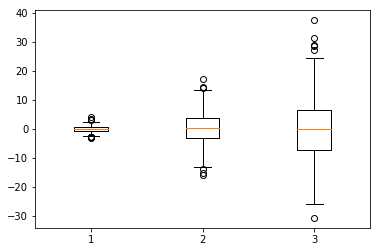

In [11]:
# example of a box and whisker plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# random numbers drawn from a Gaussian distribution
x = [randn(1000), 5 * randn(1000), 10 * randn(1000)]
# create box and whisker plot
pyplot.boxplot(x)
# show line plot
pyplot.show()

## Scatter Plot
A scatter plot (or ‘scatterplot’) is generally used to summarize the relationship between two paired data samples.

The x-axis represents observation values for the first sample, and the y-axis represents the observation values for the second sample. Each point on the plot represents a single observation.

The example below creates two data samples that are related. The first is a sample of random numbers drawn from a standard Gaussian. The second is dependent upon the first by adding a second random Gaussian value to the value of the first measure.

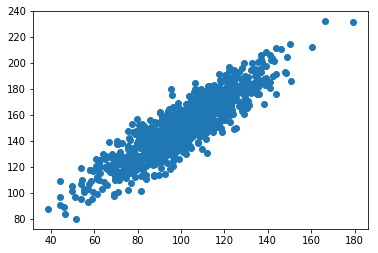

In [12]:
# example of a scatter plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# first variable
x = 20 * randn(1000) + 100
# second variable
y = x + (10 * randn(1000) + 50)
# create scatter plot
pyplot.scatter(x, y)
# show line plot
pyplot.show()

# [4]. Resampling Methods

## Bootstrap Method
The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.It can be used to estimate summary statistics such as the mean or standard deviation. It is used in applied machine learning to estimate the skill of machine learning models when making predictions on data not included in the training data.

In [14]:
# scikit-learn bootstrap
from sklearn.utils import resample
# data sample
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4, random_state=1)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

Bootstrap Sample: [0.6, 0.4, 0.5, 0.1]
OOB Sample: [0.2, 0.3]


## k-fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

Cross-validation is a statistical method used to estimate the skill of machine learning models on unseen data.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

In [15]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]
